In [1]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [2]:
import statistics

In [3]:
df = sns.load_dataset('tips')


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
np.mean(df['total_bill'])

19.78594262295082

In [6]:
np.median(df['total_bill'])

17.795

In [7]:
statistics.mode(df['total_bill'])

13.42

<Axes: >

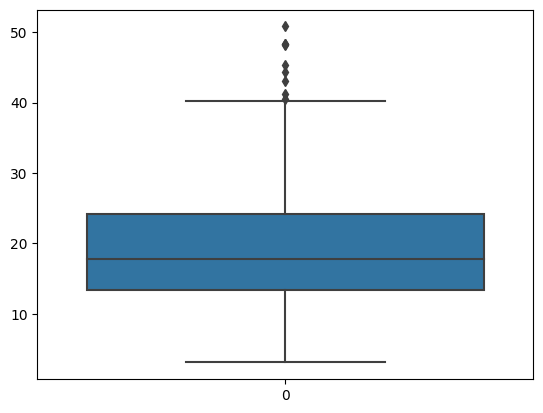

In [8]:
sns.boxplot(df['total_bill'])

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_bill', ylabel='Count'>

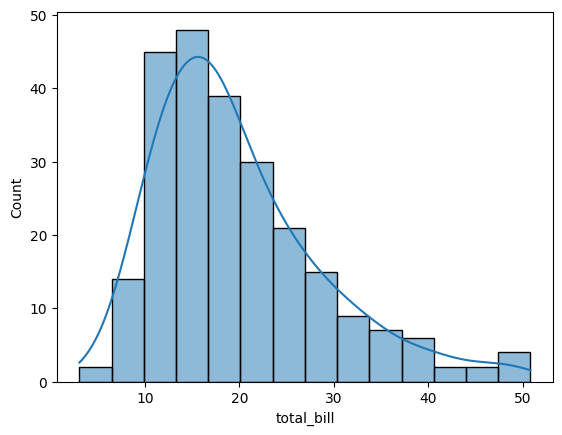

In [9]:
sns.histplot(df['total_bill'],kde=True)

In [10]:
df1 = sns.load_dataset('iris')

In [11]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_width', ylabel='Count'>

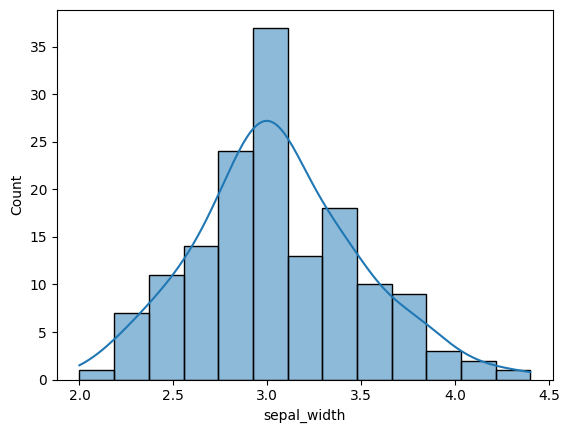

In [12]:
sns.histplot(df1['sepal_width'],kde=True)

In [16]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

In [17]:
#Outliers

In [28]:
# define our dataset
dataset = [11,10,12,13,12,14,13,15,12,14,17,19,107,10,13,12,14,12,11,14,13,15,108,15,12,10,14,13,15,10]

(array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

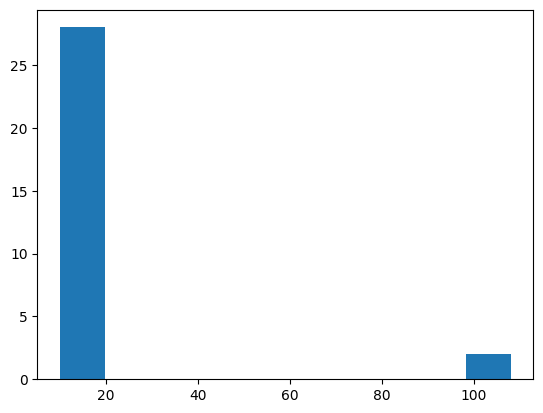

In [29]:
plt.hist(dataset)

In [32]:
## Z-score
outliers = []

def detect_outliers(data):
    threshold = 3 ##3rd SD
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [31]:
detect_outliers(dataset)

[107, 108]

## IQR

1. Sort the data 
2. Calculate Q1 and Q3
3. Calculate IQR = Q3 - Q1
4. Calculate lower and upper bounds as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR


In [33]:
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 17,
 19,
 107,
 108]

In [34]:
Q1,Q3 = np.percentile(dataset,[25,75])

In [35]:
print(Q1,Q3)

12.0 14.75


In [36]:
IQR = Q3-Q1
print(IQR)

2.75


In [38]:
lower_bound = Q1-(1.5*IQR)
higher_bound = Q3+(1.5*IQR)

In [39]:
print(lower_bound,higher_bound)

7.875 18.875


<Axes: >

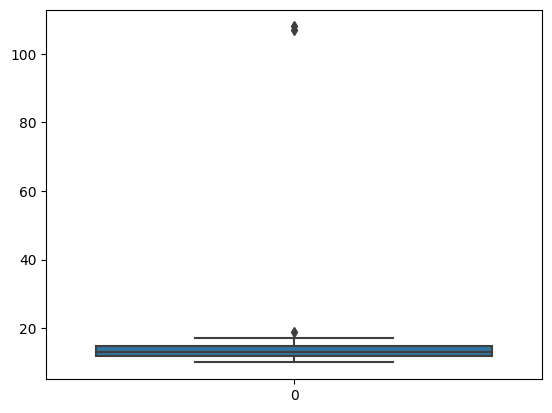

In [40]:
sns.boxplot(dataset)

In [44]:
for i in dataset:
    if i<7.8 and i>18.8:
      print("The value is less than 7.8 and greater than 18.8")